In [15]:
import pandas as pd
import matplotlib.pyplot as plt

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [16]:
df = pd.read_csv("hw3/weather.csv", encoding="utf-8", index_col=False, parse_dates=[0])

С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [17]:
df['Year'] = df['Day'].dt.year
mean_t = df.groupby('Year').mean()
print(f"Самый холодный год - {mean_t['t'].idxmin()}, средняя температура была - {min(mean_t['t'])}\
, самый теплый год - {mean_t['t'].idxmax()}, средняя температура была - {max(mean_t['t'])}")

Самый холодный год - 2012, средняя температура была - 6.980821917808219, самый теплый год - 2015, средняя температура была - 9.07945205479452


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

(array([19., 11.,  0.,  5.,  0.,  6.,  5.,  8., 14.,  5.]),
 array([2008. , 2008.8, 2009.6, 2010.4, 2011.2, 2012. , 2012.8, 2013.6,
        2014.4, 2015.2, 2016. ]),
 <a list of 10 Patch objects>)

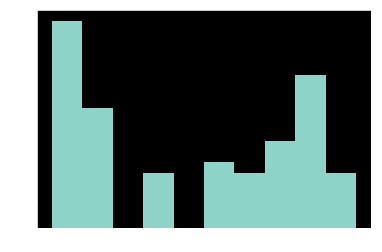

In [42]:
%matplotlib inline
warm = df.loc[(df['Day'].dt.month == 1) & (df['t'] >= 0)]['Day'].dt.year
plt.hist(warm)

**3.** В каком году было самое холодное лето (по средней температуре)

In [46]:
summer = df.loc[(df['Day'].dt.month >= 6) & (df['Day'].dt.month <= 8)]
summer.groupby('Year').mean()['t'].idxmin()
#summer.groupby('Year').mean()

2008

**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [47]:
df['$\Delta$t'] = df['t'] - df['t'].shift(-1)
print(df.loc[df['$\Delta$t'].idxmax()], '\n', df.loc[df['$\Delta$t'].idxmax() + 1])


Day          2014-05-26 00:00:00
t                             22
Year                        2014
$\Delta$t                     15
Name: 2334, dtype: object 
 Day          2014-05-27 00:00:00
t                              7
Year                        2014
$\Delta$t                     -2
Name: 2335, dtype: object


**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

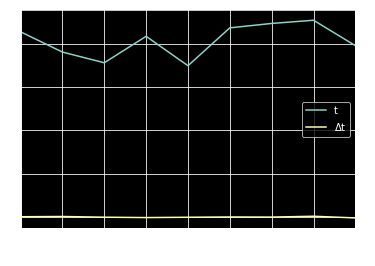

In [50]:
mean_t = df.groupby('Year').mean().plot()
plt.grid()